In [1]:
years = list(range(1991,2023))

In [10]:
import requests

In [4]:
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

In [5]:
for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("mvp/{}.html".format(year),"w+") as f:
        f.write(data.text)

In [37]:
url = "https://www.basketball-reference.com/awards/awards_2021.html"
data = requests.get(url)
with open("mvp/2021.html","w+") as f:
    f.write(data.text)

In [38]:
url = "https://www.basketball-reference.com/awards/awards_2022.html"
data = requests.get(url)
with open("mvp/2022.html","w+") as f:
    f.write(data.text)

In [2]:
from bs4 import BeautifulSoup

In [8]:
with open("C:/Users/orgeval/Desktop/ESILV/NBA_Web_Scraping/mvp/1991.html",encoding="utf8") as f:
    page = f.read()

In [9]:
soup = BeautifulSoup(page,"html.parser")

In [10]:
soup


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202211291" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '__tcfapiL

In [11]:
soup.find('tr',class_="over_header").decompose()

In [12]:
mvp_table = soup.find(id="mvp")

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [14]:
mvp_1991 = pd.read_html(str(mvp_table))

In [15]:
mvp_1991

[   Rank             Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
 0     1     Michael Jordan   27  CHI   77.0    891.0      960  0.928  82   
 1     2      Magic Johnson   31  LAL   10.0    497.0      960  0.518  79   
 2     3     David Robinson   25  SAS    6.0    476.0      960  0.496  82   
 3     4    Charles Barkley   27  PHI    2.0    222.0      960  0.231  67   
 4     5        Karl Malone   27  UTA    0.0    142.0      960  0.148  82   
 5     6      Clyde Drexler   28  POR    1.0     75.0      960  0.078  82   
 6     7      Kevin Johnson   24  PHO    0.0     32.0      960  0.033  77   
 7     8  Dominique Wilkins   31  ATL    0.0     29.0      960  0.030  81   
 8    9T         Larry Bird   34  BOS    0.0     25.0      960  0.026  60   
 9    9T       Terry Porter   27  POR    0.0     25.0      960  0.026  81   
 10   11      Patrick Ewing   28  NYK    0.0     20.0      960  0.021  81   
 11   12      John Stockton   28  UTA    0.0     15.0      960  0.016  82   

In [62]:
dfs = []

for year in years:
    with open("mvp/{}.html".format(year),encoding="utf8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr',class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp = pd.read_html(str(mvp_table))[0]
    mvp["Year"] = year
    print(year)
    
    dfs.append(mvp)

1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [63]:
mvps = pd.concat(dfs)

In [64]:
mvps.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [65]:
len(mvps)

486

In [66]:
mvps.tail()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,34.5,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,36.1,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,37.2,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022
11,10T,LeBron James,37,LAL,0.0,1.0,1000,0.001,56,37.2,...,8.2,6.2,1.3,1.1,0.524,0.359,0.756,7.5,0.172,2022


In [67]:
mvps.to_csv("mvps.csv")

In [30]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"
url = player_stats_url.format(year)
data = requests.get(url)
with open("player/1991.html","w+",encoding="utf8") as f:
    f.write(data.text)

In [25]:
from selenium import webdriver

In [26]:
driver = webdriver.Chrome(executable_path="C:/Users/orgeval/Documents/chromedriver.exe")

<ipython-input-26-970f4c8d5825>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path="C:/Users/orgeval/Documents/chromedriver.exe")


In [5]:
import time

In [31]:
year = 1991
url = player_stats_url.format(year)

driver.get(url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)

html = driver.page_source

In [32]:
for year in years : 
    url = player_stats_url.format(year)

    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)

    html = driver.page_source
    with open("player/{}.html".format(year),"w+",encoding="utf8") as f:
        f.write(html)

In [44]:
year = 1991
url = player_stats_url.format(year)

driver.get(url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)

html = driver.page_source
with open("player/{}.html".format(year),"w+",encoding="utf8") as f:
    f.write(html)

In [68]:
dfs = []
for year in years:
    with open("player/{}.html".format(year),encoding="utf8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_ = "thead" ).decompose()
    player_table = soup.find(id="per_game_stats")
    player = pd.read_html(str(player_table))[0]
    player["Year"] = year
    dfs.append(player)

In [69]:
players = pd.concat(dfs)

In [70]:
players.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022
840,605,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,...,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3,2022


In [71]:
len(players)

18885

In [72]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [73]:
players[players["Year"]==2022]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,2022
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,2022
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,2022
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,2022
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [74]:
players.to_csv("players.csv")

In [76]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [82]:
for year in years : 
    url = team_stats_url.format(year)
    data = requests.get(url)
    with open("team/{}.html".format(year),"w+",encoding="utf8") as f:
        f.write(data.text)

In [89]:
dfs = []
for year in years:
    with open("team/{}.html".format(year),encoding="utf8") as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_ = "thead" ).decompose()
    team_table = soup.find(id="divs_standings_E")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Eastern Conference"]
    del team["Eastern Conference"]
    dfs.append(team)
    
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_ = "thead" ).decompose()
    team_table = soup.find(id="divs_standings_W")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Western Conference"]
    del team["Western Conference"]
    dfs.append(team)

In [90]:
teams = pd.concat(dfs)

In [91]:
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [92]:
teams.to_csv("teams.csv")

## Recherche popularité twitter

In [4]:
import tweepy

consumer_key = "n8dsWidPEdTAJo163nv9HwVW6"
consumer_secret = "gFbMsKgihz9zhpUvsN56r8CPfiXEYGAgAoEwhDidKxKhpPxohI"
access_token = "780158479139008512-erBCeNHIAQW2wGKPPtMrAXEGuoH3YvX"
access_token_secret = "dpqjNPZpcBRpzZI3vvVfvhPaJq0W3bKepqkoBjsN5JDtt"


auth = tweepy.OAuth1UserHandler(consumer_key,consumer_secret,access_token,access_token_secret)
api = tweepy.API(auth)
public_tweets = api.home_timeline()

In [5]:
tweet_count = 0
for tweet in tweepy.Cursor(auth,api.search_tweets, q="lebron james",since="2021-01-01",until ="2021-12-31",lang="en").items():
    tweet_count +=1
    
print(f"Number of tweets containing lebron james mvp in 2021 : {tweet_count}")

Unexpected parameter: since


Number of tweets containing lebron james mvp in 2021 : 0


In [31]:
tweet_count = 0
for tweet in api.search_full_archive(label="searchPlayers",query="lebron james mvp",fromDate ="202101010001",toDate = "20210131359"):
    tweet_count += 1

print(f"Number of tweets containing lebron james mvp in 2021 : {tweet_count}")

HTTPException: 422 Unprocessable Entity
There were errors processing your request: Invalid 'toDate':'20210131359'. 'toDate' must be in format 'yyyyMMddHHmm'. For example, '201101012315' for January 1st, 11:15 pm 2011 UTC

In [10]:
tweet_count = 0
for tweet in api.search_full_archive(label="searchPlayers",query="Ivica Zubac mvp",fromDate ="202101010001",toDate = "202112312359"):
    tweet_count += 1

print(f"Number of tweets containing Ivica Zubac mvp in 2021 : {tweet_count}")

Number of tweets containing Ivica Zubac mvp in 2021 : 77


In [143]:
df_Players = pd.read_csv("players.csv")

In [144]:
df_Mvps = pd.read_csv("mvps.csv")

In [145]:
df_Players.head()

,Unnamed: 0,Unnamed: 0.1,Rk,Player,Pos,Age,Tm,G,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Size
0,0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2m13
1,1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,...,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991,2m13
2,2,2,3,Mark Acres,C,28,ORL,68,0,19.3,...,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991,2m13
3,3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,...,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991,2m13
4,4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,...,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991,2m13


In [9]:
len(df_Players['Player'].unique())

2800

In [39]:
import time

In [46]:
def MVP_tweets_count(player,year):
    tweet_count = 0
    if(year>2007):

        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}01010001".format(year),toDate = "{}01302359".format(year)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}02010001".format(year),toDate = "{}02282359".format(year)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}03010001".format(year),toDate = "{}03302359".format(year)):
            tweet_count += 1    
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}04010001".format(year),toDate = "{}04302359".format(year)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}05010001".format(year),toDate = "{}05302359".format(year)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}06010001".format(year),toDate = "{}06302359".format(year)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}01010001".format(year),toDate = "{}01302359".format(year)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}10010001".format(year-1),toDate = "{}10302359".format(year-1)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}11010001".format(year-1),toDate = "{}11302359".format(year-1)):
            tweet_count += 1
        for tweet in api.search_full_archive(label="searchPlayers",query=player,fromDate ="{}12010001".format(year-1),toDate = "{}12302359".format(year-1)):
            tweet_count += 1
            time.sleep(15)
    else:
        tweet_count = 0
    return tweet_count

In [37]:
MVP_tweets_count(player="Ivica Zubac mvp",year=2019)

Number of tweets containing Ivica Zubac mvp in 2021 : 76


In [47]:
df_Players["MVP_tweets"] = df_Players.apply(lambda rows : MVP_tweets_count(player = "{} mvp".format(rows["Player"]),year=rows["Year"]), axis=1 )

TooManyRequests: 429 Too Many Requests
Request exceeds account’s current package request limits. Please upgrade your package and retry or contact Twitter about enterprise access.

In [48]:
df_Players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


## Récupération de la taille des joueurs via "basket-usa"

In [12]:
url = "http://www.google.com/search?start=0&num=10&q=lebron+james &cr=countryCA&lr=lang_fr&client=google-csbe&cx=00255077836266642015:u-scht7a-8i"
data = requests.get(url)
doc = BeautifulSoup(data.text,"html.parser")

<!DOCTYPE html>
<html lang="fr"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>lebron james - Recherche Google</title><script nonce="q89ppKN5TP9ezWlyjJHPcg">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.goog
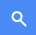
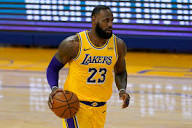
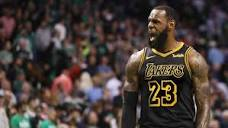

In [36]:
print(doc)

In [39]:
taille = doc.find_all(text="m")

In [40]:
taille

[]

In [44]:
taille = doc.find("div",class_="LrzXr kno-fv wHYlTd z8gr9e")

In [45]:
taille

In [24]:
parent = taille[0].parent
print(parent)

IndexError: list index out of range

In [19]:
span = parent.find("")
print(span)

None


https://www.google.co.in/?q=Linkin+Park


In [59]:
url = "https://www.basketusa.com/joueurs/kobe-bryant/"
data = requests.get(url)
doc = BeautifulSoup(data.text,"html.parser")

In [60]:
taille = doc.find_all(text="1m98")

In [61]:
taille

['1m98']

In [66]:
parent = taille[0].parent
print(parent.string)

1m98


In [65]:
span = parent.find(class_="player-value")
print(span)

None


In [67]:
taille = doc.find_all(class_="player-value")

In [68]:
taille

[<span class="player-value">23 août 1978 (Décédé)</span>,
 <span class="player-value">Américaine</span>,
 <span class="player-value">1m98</span>,
 <span class="player-value">96kg</span>,
 <span class="player-value">1996 — Round 1, Pick 13, Charlotte Hornets</span>,
 <span class="player-value">Lower Merion High School (Pennsylvania)</span>]

In [73]:
parent = taille[2].parent
print(parent)

<li>
<span class="player-attribute">Taille :</span>
<span class="player-value">1m98</span>
</li>


In [76]:
class_player = parent.find(class_="player-value")
print(class_player.string)

1m98


In [13]:
import time

In [14]:
def get_size(player):
    player = player.lower()
    player = player.split()
    if(len(player)>1):
        first_name = player[0]
        last_name = player[1]
        url = "https://www.basketusa.com/joueurs/{}-{}/".format(first_name,last_name)
        data = requests.get(url)
        doc = BeautifulSoup(data.text,"html.parser")
        taille = doc.find_all(class_="player-value")
        try :
            parent = taille[2].parent
        except (IndexError):
            class_player = "0m00"
        else :
            class_player = (parent.find(class_="player-value")).string
        print(player)
    else:
        class_player = "0m00"
    return class_player

In [15]:
get_size("James Harden")

['james', 'harden']


'1m96'

In [16]:
df_Players.head(50)

,Unnamed: 0,Unnamed: 0.1,Rk,Player,Pos,Age,Tm,G,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Size
0,0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2m13
1,1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,...,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991,2m13
2,2,2,3,Mark Acres,C,28,ORL,68,0,19.3,...,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991,2m13
3,3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,...,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991,2m13
4,4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,...,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991,2m13
5,5,5,6,Danny Ainge,SG,31,POR,80,0,21.4,...,2.0,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991,2m13
6,6,6,7,Mark Alarie,PF,27,WSB,42,1,14.0,...,1.8,2.8,1.1,0.4,0.2,1.0,2.1,5.8,1991,2m13
7,7,7,8,Steve Alford,PG,26,DAL,34,0,6.9,...,0.4,0.7,0.6,0.2,0.0,0.5,0.3,4.4,1991,2m13
8,8,8,9,Greg Anderson,PF,26,TOT,68,2,13.6,...,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991,2m13
9,9,9,9,Greg Anderson,PF,26,MIL,26,0,9.5,...,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991,2m13


In [17]:
df_Players['Player'].unique()

array(['Alaa Abdelnaby', 'Mahmoud Abdul-Rauf', 'Mark Acres', ...,
       'Moses Wright', 'Gabe York', 'Omer Yurtseven'], dtype=object)

In [23]:
temp = pd.DataFrame(df_Players['Player'].unique(),columns = ['Player'])

In [24]:
temp

,Player
0,Alaa Abdelnaby
1,Mahmoud Abdul-Rauf
2,Mark Acres
3,Michael Adams
4,Mark Aguirre
...,...
2795,Ziaire Williams
2796,McKinley Wright IV
2797,Moses Wright
2798,Gabe York


In [22]:
temp.columns

RangeIndex(start=0, stop=1, step=1)

In [25]:
temp['Size'] = temp.apply(lambda row : get_size(row['Player']),axis=1)

['alaa', 'abdelnaby']
['mahmoud', 'abdul-rauf']
['mark', 'acres']
['michael', 'adams']
['mark', 'aguirre']
['danny', 'ainge']
['mark', 'alarie']
['steve', 'alford']
['greg', 'anderson']
['nick', 'anderson']
['ron', 'anderson']
['willie', 'anderson']
['michael', 'ansley']
['b.j.', 'armstrong']
['vincent', 'askew']
['keith', 'askins']
['miloš', 'babić']
['thurl', 'bailey']
['cedric', 'ball']
['ken', 'bannister']
['charles', 'barkley*']
['dana', 'barros']
['john', 'battle']
['kenny', 'battle']
['william', 'bedford']
['benoit', 'benjamin']
['winston', 'bennett']
['larry', 'bird*']
['rolando', 'blackman']
['lance', 'blanks']
['mookie', 'blaylock']
['muggsy', 'bogues']
['manute', 'bol']
['anthony', 'bonner']
['sam', 'bowie']
['randy', 'breuer']
['frank', 'brickowski']
['scott', 'brooks']
['chucky', 'brown']
['dee', 'brown']
['mike', 'brown']
['tony', 'brown']
['mark', 'bryant']
['jud', 'buechler']
['matt', 'bullard']
['willie', 'burton']
['greg', 'butler']
['michael', 'cage']
['adrian', 'cal

In [26]:
temp.head()

,Player,Size
0,Alaa Abdelnaby,2m08
1,Mahmoud Abdul-Rauf,1m83
2,Mark Acres,2m11
3,Michael Adams,1m78
4,Mark Aguirre,1m98


In [27]:
temp["Size"] = temp["Size"].str.replace("m",".")

In [28]:
temp.head()

,Player,Size
0,Alaa Abdelnaby,2.08
1,Mahmoud Abdul-Rauf,1.83
2,Mark Acres,2.11
3,Michael Adams,1.78
4,Mark Aguirre,1.98


In [146]:
df_Players = df_Players.merge(temp,left_on='Player',right_on='Player')

In [147]:
df_Players.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Year', 'Size_x', 'Size_y'],
      dtype='object')

## Cleaning data frames

In [46]:
df_Mvps = pd.read_csv("mvps.csv")

In [148]:
df_Mvps = df_Mvps[["Player","Year","Pts Won","Pts Max","Share"]]

In [149]:
df_Mvps

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148
...,...,...,...,...,...
481,Stephen Curry,2022,4.0,1000,0.004
482,Chris Paul,2022,2.0,1000,0.002
483,DeMar DeRozan,2022,1.0,1000,0.001
484,Kevin Durant,2022,1.0,1000,0.001


In [150]:
df_Players.head()

,Unnamed: 0,Unnamed: 0.1,Rk,Player,Pos,Age,Tm,G,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Size_x,Size_y
0,0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,...,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2m13,2.08
1,459,0,1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,...,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992,2m13,2.08
2,935,0,1,Alaa Abdelnaby,PF,24,TOT,75,52,17.5,...,4.5,0.4,0.3,0.3,1.3,2.5,7.7,1993,2m13,2.08
3,936,1,1,Alaa Abdelnaby,PF,24,MIL,12,0,13.3,...,3.1,0.8,0.5,0.3,1.1,2.0,5.3,1993,2m13,2.08
4,937,2,1,Alaa Abdelnaby,PF,24,BOS,63,52,18.3,...,4.8,0.3,0.3,0.3,1.3,2.6,8.2,1993,2m13,2.08


In [151]:
del df_Players["Unnamed: 0"]

In [152]:
del df_Players["Unnamed: 0.1"]

In [153]:
del df_Players["Rk"]

In [154]:
del df_Players['Size_x']

In [155]:
df_Players["Player"] = df_Players["Player"].str.replace("*","" , regex= False)

In [156]:
df_Players.head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Size_y
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2.08
1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992,2.08
2,Alaa Abdelnaby,PF,24,TOT,75,52,17.5,3.3,6.3,.518,...,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,1993,2.08
3,Alaa Abdelnaby,PF,24,MIL,12,0,13.3,2.2,4.7,.464,...,2.1,3.1,0.8,0.5,0.3,1.1,2.0,5.3,1993,2.08
4,Alaa Abdelnaby,PF,24,BOS,63,52,18.3,3.5,6.6,.525,...,3.0,4.8,0.3,0.3,0.3,1.3,2.6,8.2,1993,2.08
5,Alaa Abdelnaby,PF,25,BOS,13,0,12.2,1.8,4.2,.436,...,2.6,3.5,0.2,0.2,0.2,1.3,1.5,4.9,1994,2.08
6,Alaa Abdelnaby,PF,26,TOT,54,0,9.4,2.2,4.3,.511,...,1.4,2.1,0.2,0.3,0.2,0.8,1.9,4.7,1995,2.08
7,Alaa Abdelnaby,PF,26,SAC,51,0,9.3,2.3,4.3,.532,...,1.4,2.1,0.3,0.3,0.2,0.8,2.0,5.0,1995,2.08
8,Alaa Abdelnaby,PF,26,PHI,3,0,10.0,0.3,3.7,.091,...,1.7,2.7,0.0,0.0,0.0,1.7,0.7,0.7,1995,2.08
9,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991,1.83


In [39]:
def single_row(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row
df_Players = df_Players.groupby(["Player","Year"]).apply(single_row)

In [157]:
df_Players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Size_y
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2.08
1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992,2.08
2,Alaa Abdelnaby,PF,24,TOT,75,52,17.5,3.3,6.3,.518,...,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,1993,2.08
3,Alaa Abdelnaby,PF,24,MIL,12,0,13.3,2.2,4.7,.464,...,2.1,3.1,0.8,0.5,0.3,1.1,2.0,5.3,1993,2.08
4,Alaa Abdelnaby,PF,24,BOS,63,52,18.3,3.5,6.6,.525,...,3.0,4.8,0.3,0.3,0.3,1.3,2.6,8.2,1993,2.08


In [158]:
df_Players.index = df_Players.index.droplevel()

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [159]:
df_Players.index = df_Players.index.droplevel()

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [160]:
df_Players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Size_y
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991,2.08
1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992,2.08
2,Alaa Abdelnaby,PF,24,TOT,75,52,17.5,3.3,6.3,.518,...,2.8,4.5,0.4,0.3,0.3,1.3,2.5,7.7,1993,2.08
3,Alaa Abdelnaby,PF,24,MIL,12,0,13.3,2.2,4.7,.464,...,2.1,3.1,0.8,0.5,0.3,1.1,2.0,5.3,1993,2.08
4,Alaa Abdelnaby,PF,24,BOS,63,52,18.3,3.5,6.6,.525,...,3.0,4.8,0.3,0.3,0.3,1.3,2.6,8.2,1993,2.08


In [161]:
df_Players[df_Players["Player"]=="James Harden"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Size_y
13702,James Harden,SG,20,OKC,76,0,22.9,3.1,7.6,.403,...,2.6,3.2,1.8,1.1,0.3,1.4,2.6,9.9,2010,1.96
13703,James Harden,SG,21,OKC,82,5,26.7,3.6,8.3,.436,...,2.6,3.1,2.1,1.1,0.3,1.3,2.5,12.2,2011,1.96
13704,James Harden,SG,22,OKC,62,2,31.4,5.0,10.1,.491,...,3.6,4.1,3.7,1.0,0.2,2.2,2.4,16.8,2012,1.96
13705,James Harden,SG,23,HOU,78,78,38.3,7.5,17.1,.438,...,4.1,4.9,5.8,1.8,0.5,3.8,2.3,25.9,2013,1.96
13706,James Harden,SG,24,HOU,73,73,38.0,7.5,16.5,.456,...,3.9,4.7,6.1,1.6,0.4,3.6,2.4,25.4,2014,1.96
13707,James Harden,SG,25,HOU,81,81,36.8,8.0,18.1,.440,...,4.7,5.7,7.0,1.9,0.7,4.0,2.6,27.4,2015,1.96
13708,James Harden,SG,26,HOU,82,82,38.1,8.7,19.7,.439,...,5.3,6.1,7.5,1.7,0.6,4.6,2.8,29.0,2016,1.96
13709,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,.440,...,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,2017,1.96
13710,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,.449,...,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2018,1.96
13711,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,.442,...,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,1.96


In [162]:
combined = df_Players.merge(df_Mvps,how="outer", on = ["Player","Year"])

In [163]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Size_y,Pts Won,Pts Max,Share
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.1,0.3,0.5,0.9,3.1,1991,2.08,NaN,NaN,NaN
1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,0.4,0.2,0.9,1.9,6.1,1992,2.08,NaN,NaN,NaN
2,Alaa Abdelnaby,PF,24,TOT,75,52,17.5,3.3,6.3,.518,...,0.3,0.3,1.3,2.5,7.7,1993,2.08,NaN,NaN,NaN
3,Alaa Abdelnaby,PF,24,MIL,12,0,13.3,2.2,4.7,.464,...,0.5,0.3,1.1,2.0,5.3,1993,2.08,NaN,NaN,NaN
4,Alaa Abdelnaby,PF,24,BOS,63,52,18.3,3.5,6.6,.525,...,0.3,0.3,1.3,2.6,8.2,1993,2.08,NaN,NaN,NaN


In [164]:
combined[combined["Player"]=="James Harden"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Size_y,Pts Won,Pts Max,Share
13702,James Harden,SG,20,OKC,76,0,22.9,3.1,7.6,.403,...,1.1,0.3,1.4,2.6,9.9,2010,1.96,NaN,NaN,NaN
13703,James Harden,SG,21,OKC,82,5,26.7,3.6,8.3,.436,...,1.1,0.3,1.3,2.5,12.2,2011,1.96,NaN,NaN,NaN
13704,James Harden,SG,22,OKC,62,2,31.4,5.0,10.1,.491,...,1.0,0.2,2.2,2.4,16.8,2012,1.96,NaN,NaN,NaN
13705,James Harden,SG,23,HOU,78,78,38.3,7.5,17.1,.438,...,1.8,0.5,3.8,2.3,25.9,2013,1.96,33.0,1210.0,0.027
13706,James Harden,SG,24,HOU,73,73,38.0,7.5,16.5,.456,...,1.6,0.4,3.6,2.4,25.4,2014,1.96,85.0,1250.0,0.068
13707,James Harden,SG,25,HOU,81,81,36.8,8.0,18.1,.440,...,1.9,0.7,4.0,2.6,27.4,2015,1.96,936.0,1300.0,0.720
13708,James Harden,SG,26,HOU,82,82,38.1,8.7,19.7,.439,...,1.7,0.6,4.6,2.8,29.0,2016,1.96,9.0,1310.0,0.007
13709,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,.440,...,1.5,0.5,5.7,2.7,29.1,2017,1.96,753.0,1010.0,0.746
13710,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,.449,...,1.8,0.7,4.4,2.3,30.4,2018,1.96,965.0,1010.0,0.955
13711,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,.442,...,2.0,0.7,5.0,3.1,36.1,2019,1.96,776.0,1010.0,0.768


In [165]:
combined[["Pts Won","Pts Max","Share"]] = combined[["Pts Won","Pts Max","Share"]].fillna(0)

In [166]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Size_y,Pts Won,Pts Max,Share
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.1,0.3,0.5,0.9,3.1,1991,2.08,0.0,0.0,0.0
1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,0.4,0.2,0.9,1.9,6.1,1992,2.08,0.0,0.0,0.0
2,Alaa Abdelnaby,PF,24,TOT,75,52,17.5,3.3,6.3,.518,...,0.3,0.3,1.3,2.5,7.7,1993,2.08,0.0,0.0,0.0
3,Alaa Abdelnaby,PF,24,MIL,12,0,13.3,2.2,4.7,.464,...,0.5,0.3,1.1,2.0,5.3,1993,2.08,0.0,0.0,0.0
4,Alaa Abdelnaby,PF,24,BOS,63,52,18.3,3.5,6.6,.525,...,0.3,0.3,1.3,2.6,8.2,1993,2.08,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,Moses Wright,PF,23,TOT,4,0,3.5,0.3,1.0,.250,...,0.0,0.3,0.0,0.0,1.3,2022,0.00,0.0,0.0,0.0
18881,Moses Wright,PF,23,LAC,1,0,1.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,2022,0.00,0.0,0.0,0.0
18882,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,.250,...,0.0,0.3,0.0,0.0,1.7,2022,0.00,0.0,0.0,0.0
18883,Gabe York,SG,28,IND,2,0,10.5,1.0,3.5,.286,...,1.0,0.5,0.5,2.0,4.0,2022,0.00,0.0,0.0,0.0


In [167]:
df_Teams = pd.read_csv("teams.csv")

In [168]:
df_Teams.head(20)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [169]:
df_Teams = df_Teams[~df_Teams["W"].str.contains("Division")]

In [170]:
df_Teams.head(20)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*
10,10,43,39,.524,18.0,109.8,109.0,0.72,1991,Atlanta Hawks*


In [171]:
df_Teams["Team"] = df_Teams["Team"].str.replace("*","",regex=False)

In [172]:
df_Teams.head()

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [173]:
df_Teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [174]:
combined["Tm"].unique()

array(['POR', 'TOT', 'MIL', 'BOS', 'SAC', 'PHI', 'DEN', 'VAN', 'ORL',
       'HOU', 'WSB', 'CHH', 'DET', 'LAC', 'PHO', 'DAL', 'NJN', 'ATL',
       'SAS', 'MEM', 'TOR', 'NYK', 'MIA', 'CHI', 'GSW', 'SEA', 'IND',
       'CLE', 'UTA', 'MIN', 'LAL', 'WAS', 'Tm', 'NOH', 'CHA', 'CHO',
       'OKC', 'NOP', 'NOK', 'BRK'], dtype=object)

In [175]:
nicknames = {}
with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        nicknames[abbrev] = name

In [176]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [177]:
combined["Team"] = combined["Tm"].map(nicknames)

In [178]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Year,Size_y,Pts Won,Pts Max,Share,Team
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.3,0.5,0.9,3.1,1991,2.08,0.0,0.0,0.0,Portland Trail Blazers
1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,0.2,0.9,1.9,6.1,1992,2.08,0.0,0.0,0.0,Portland Trail Blazers
2,Alaa Abdelnaby,PF,24,TOT,75,52,17.5,3.3,6.3,.518,...,0.3,1.3,2.5,7.7,1993,2.08,0.0,0.0,0.0,NaN
3,Alaa Abdelnaby,PF,24,MIL,12,0,13.3,2.2,4.7,.464,...,0.3,1.1,2.0,5.3,1993,2.08,0.0,0.0,0.0,Milwaukee Bucks
4,Alaa Abdelnaby,PF,24,BOS,63,52,18.3,3.5,6.6,.525,...,0.3,1.3,2.6,8.2,1993,2.08,0.0,0.0,0.0,Boston Celtics


In [179]:
stats = combined.merge(df_Teams,how="outer",on=["Team","Year"])

In [180]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.0,Portland Trail Blazers,9.0,63,19,.768,—,114.7,106.0,8.47
1,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,.472,...,0.0,Portland Trail Blazers,9.0,63,19,.768,—,114.7,106.0,8.47
2,Mark Bryant,PF,25,POR,53,0,14.7,1.9,3.8,.488,...,0.0,Portland Trail Blazers,9.0,63,19,.768,—,114.7,106.0,8.47
3,Wayne Cooper,C,34,POR,67,1,11.1,0.9,2.2,.393,...,0.0,Portland Trail Blazers,9.0,63,19,.768,—,114.7,106.0,8.47
4,Walter Davis,SG,36,POR,32,1,13.7,2.7,6.1,.446,...,0.0,Portland Trail Blazers,9.0,63,19,.768,—,114.7,106.0,8.47


In [181]:
del stats["Unnamed: 0"]

In [182]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.0,0.0,Portland Trail Blazers,63,19,.768,—,114.7,106.0,8.47
1,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,.472,...,0.0,0.0,Portland Trail Blazers,63,19,.768,—,114.7,106.0,8.47
2,Mark Bryant,PF,25,POR,53,0,14.7,1.9,3.8,.488,...,0.0,0.0,Portland Trail Blazers,63,19,.768,—,114.7,106.0,8.47
3,Wayne Cooper,C,34,POR,67,1,11.1,0.9,2.2,.393,...,0.0,0.0,Portland Trail Blazers,63,19,.768,—,114.7,106.0,8.47
4,Walter Davis,SG,36,POR,32,1,13.7,2.7,6.1,.446,...,0.0,0.0,Portland Trail Blazers,63,19,.768,—,114.7,106.0,8.47


In [183]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Size_y      object
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [184]:
stats = stats.apply(pd.to_numeric,errors="ignore")

In [186]:
stats = stats.apply(pd.to_numeric,errors="ignore")

In [188]:
stats["GB"].unique()

array(['—', nan, '29.0', '12.0', '25.0', '20.0', '33.0', '35.0', '31.0',
       '19.0', '16.0', '21.0', '24.0', '23.0', '34.0', '30.0', '38.0',
       '26.0', '2.0', '11.0', '17.0', '36.0', '7.0', '27.0', '13.0',
       '37.0', '10.0', '44.0', '14.0', '1.0', '8.0', '6.0', '3.0', '51.0',
       '5.0', '28.0', '42.0', '39.0', '43.0', '15.0', '32.0', '18.0',
       '40.0', '22.0', '46.0', '9.0', '47.0', '48.0', '4.0', '45.0',
       '41.0', '50.0', '52.0', '12.5', '56.0', '4.5', '20.5', '11.5',
       '25.5', '21.5', '18.5', '1.5', '3.5', '2.5', '10.5', '32.5',
       '22.5'], dtype=object)

In [189]:
stats["GB"] = stats["GB"].str.replace("—","0")

In [190]:
stats["GB"].unique()

array(['0', nan, '29.0', '12.0', '25.0', '20.0', '33.0', '35.0', '31.0',
       '19.0', '16.0', '21.0', '24.0', '23.0', '34.0', '30.0', '38.0',
       '26.0', '2.0', '11.0', '17.0', '36.0', '7.0', '27.0', '13.0',
       '37.0', '10.0', '44.0', '14.0', '1.0', '8.0', '6.0', '3.0', '51.0',
       '5.0', '28.0', '42.0', '39.0', '43.0', '15.0', '32.0', '18.0',
       '40.0', '22.0', '46.0', '9.0', '47.0', '48.0', '4.0', '45.0',
       '41.0', '50.0', '52.0', '12.5', '56.0', '4.5', '20.5', '11.5',
       '25.5', '21.5', '18.5', '1.5', '3.5', '2.5', '10.5', '32.5',
       '22.5'], dtype=object)

In [191]:
stats = stats.apply(pd.to_numeric,errors="ignore")

In [192]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Size_y      object
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [196]:
stats['Size_y'] = pd.to_numeric(stats['Size_y'],errors='coerce')

In [120]:
stats['Size_y'] = stats['Size_y'].str.replace("","")

In [197]:
stats['Size_y'].unique()

array([2.08, 1.93, 2.06, 1.98, 0.  , 2.13, 2.01, 1.91, 2.03, 1.88, 2.11,
       1.96, 1.85, 1.83, 1.8 , 1.68, 2.29, 1.78, 1.7 , 2.16, 2.31, 1.6 ,
       2.18, 2.21, 1.65, 2.24, 1.75,  nan])

In [226]:
stats = stats[stats['Player']!='Player']

In [228]:
stats.to_csv("stats_player_team.csv",index=None)

In [60]:
train = pd.read_csv("stats_player_team.csv")

In [61]:
train.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
1,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,0.472,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
2,Mark Bryant,PF,25,POR,53,0,14.7,1.9,3.8,0.488,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
3,Wayne Cooper,C,34,POR,67,1,11.1,0.9,2.2,0.393,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
4,Walter Davis,SG,36,POR,32,1,13.7,2.7,6.1,0.446,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47


In [62]:
train.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Size_y     0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [63]:
train[train["2PA"]==0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
150,Kevin Pritchard,PG,27,PHI,5,0,7.2,0.0,0.6,0.000,...,0.0,0.0,Philadelphia 76ers,24.0,58.0,0.293,33.0,95.4,100.4,-5.06
393,Manute Bol,C,31,WSB,2,0,3.0,0.0,0.0,0.000,...,0.0,0.0,Washington Bullets,24.0,58.0,0.293,33.0,100.4,107.7,-7.13
438,Donald Hodge,C,26,CHH,2,0,1.0,0.0,0.0,0.000,...,0.0,0.0,Charlotte Hornets,41.0,41.0,0.500,31.0,102.8,103.4,-0.48
678,Tom Hovasse,SF,28,ATL,2,0,2.0,0.0,0.5,0.000,...,0.0,0.0,Atlanta Hawks,42.0,40.0,0.512,10.0,96.6,95.3,1.06
1031,Steve Bardo,SG,23,SAS,1,0,1.0,0.0,0.0,0.000,...,0.0,0.0,San Antonio Spurs,47.0,35.0,0.573,8.0,104.0,100.6,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17963,Jaime Echenique,C,24,WAS,1,0,3.0,0.0,0.0,0.000,...,0.0,0.0,Washington Wizards,35.0,47.0,0.427,18.0,108.6,112.0,-3.23
17992,DeJon Jarreau,SG,24,IND,1,0,1.0,0.0,0.0,0.000,...,0.0,0.0,Indiana Pacers,25.0,57.0,0.305,26.0,111.5,114.9,-3.26
18118,Ade Murkey,SG,24,SAC,1,0,1.0,0.0,0.0,0.000,...,0.0,0.0,Sacramento Kings,30.0,52.0,0.366,34.0,110.3,115.8,-5.26
18187,Dakota Mathias,SG,26,MEM,6,0,2.7,0.3,1.0,0.333,...,0.0,0.0,Memphis Grizzlies,56.0,26.0,0.683,0.0,115.6,109.9,5.37


In [64]:
train = train.fillna(0)

In [66]:
train.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Size_y',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [67]:
len(train.columns)

42

In [68]:
stats = train

In [69]:
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year', 'Size_y', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [70]:
train = stats[stats["Year"] != 2010]

In [71]:
train.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,0.474,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
1,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,0.472,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
2,Mark Bryant,PF,25,POR,53,0,14.7,1.9,3.8,0.488,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
3,Wayne Cooper,C,34,POR,67,1,11.1,0.9,2.2,0.393,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47
4,Walter Davis,SG,36,POR,32,1,13.7,2.7,6.1,0.446,...,0.0,0.0,Portland Trail Blazers,63.0,19.0,0.768,0.0,114.7,106.0,8.47


In [72]:
train[predictors]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,Year,Size_y,W,L,W/L%,GB,PS/G,PA/G,SRS
0,22,43,0,6.7,1.3,2.7,0.474,0.0,0.0,0.000,...,3.1,1991,2.08,63.0,19.0,0.768,0.0,114.7,106.0,8.47
1,31,80,0,21.4,4.2,8.9,0.472,1.3,3.1,0.406,...,11.1,1991,1.93,63.0,19.0,0.768,0.0,114.7,106.0,8.47
2,25,53,0,14.7,1.9,3.8,0.488,0.0,0.0,0.000,...,5.1,1991,2.06,63.0,19.0,0.768,0.0,114.7,106.0,8.47
3,34,67,1,11.1,0.9,2.2,0.393,0.0,0.0,0.000,...,2.2,1991,2.08,63.0,19.0,0.768,0.0,114.7,106.0,8.47
4,36,32,1,13.7,2.7,6.1,0.446,0.0,0.1,0.333,...,6.1,1991,1.98,63.0,19.0,0.768,0.0,114.7,106.0,8.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,25,2,0,5.0,0.5,2.0,0.250,0.0,1.0,0.000,...,1.0,2022,0.00,56.0,26.0,0.683,0.0,115.6,109.9,5.37
18194,22,12,0,5.9,0.4,1.3,0.313,0.3,0.8,0.333,...,1.1,2022,0.00,56.0,26.0,0.683,0.0,115.6,109.9,5.37
18195,24,2,0,4.0,0.0,1.0,0.000,0.0,1.0,0.000,...,0.0,2022,0.00,56.0,26.0,0.683,0.0,115.6,109.9,5.37
18196,24,3,0,2.7,0.0,0.3,0.000,0.0,0.0,0.000,...,0.0,2022,0.00,56.0,26.0,0.683,0.0,115.6,109.9,5.37


In [73]:
test = stats[stats["Year"] == 2010]

In [74]:
test

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
3917,Michael Finley,SF,36,TOT,46,7,15.4,1.8,4.0,0.440,...,0.0,0.0,0,0.0,0.0,0.000,0.0,0.0,0.0,0.00
3918,Theo Ratliff,C,36,TOT,49,29,16.5,1.4,3.1,0.461,...,0.0,0.0,0,0.0,0.0,0.000,0.0,0.0,0.0,0.00
3919,Marcus Camby,PF-C,35,TOT,74,74,31.3,3.2,6.8,0.475,...,0.0,0.0,0,0.0,0.0,0.000,0.0,0.0,0.0,0.00
3920,Allen Iverson,SG-PG,34,TOT,28,24,30.9,4.9,11.3,0.430,...,0.0,0.0,0,0.0,0.0,0.000,0.0,0.0,0.0,0.00
3921,Tracy McGrady,SG,30,TOT,30,24,22.4,3.0,7.8,0.387,...,0.0,0.0,0,0.0,0.0,0.000,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14259,Kosta Koufos,C,20,UTA,36,0,4.8,0.6,1.3,0.468,...,0.0,0.0,Utah Jazz,53.0,29.0,0.646,0.0,104.2,98.9,5.33
14260,Sundiata Gaines,PG,23,UTA,32,0,6.8,1.2,2.6,0.463,...,0.0,0.0,Utah Jazz,53.0,29.0,0.646,0.0,104.2,98.9,5.33
14261,Othyus Jeffers,SG,24,UTA,14,0,5.2,0.9,2.1,0.414,...,0.0,0.0,Utah Jazz,53.0,29.0,0.646,0.0,104.2,98.9,5.33
14262,Wesley Matthews,SG,23,UTA,82,48,24.7,3.3,6.9,0.483,...,0.0,0.0,Utah Jazz,53.0,29.0,0.646,0.0,104.2,98.9,5.33


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
forest = RandomForestRegressor(max_depth = 4,random_state=42)

In [77]:
forest.fit(train[predictors],train["Share"])

RandomForestRegressor(max_depth=4, random_state=42)

In [78]:
predictions = forest.predict(test[predictors])

In [79]:
predictions = pd.DataFrame(predictions, columns=["predictions"],index=test.index)

In [80]:
predictions

,predictions
3917,0.000569
3918,0.000569
3919,0.000989
3920,0.000569
3921,0.000569
...,...
14259,0.000569
14260,0.000569
14261,0.000569
14262,0.000569


In [81]:
combination = pd.concat([test[["Player","Share"]],predictions],axis=1)

In [82]:
combination.sort_values("predictions",ascending=False).head(20)

,Player,Share,predictions
8942,LeBron James,0.980,0.756339
10951,Kobe Bryant,0.487,0.479127
12030,Kevin Durant,0.495,0.295010
11591,Carmelo Anthony,0.053,0.263533
9935,Dirk Nowitzki,0.045,0.118400
11912,Dwight Howard,0.389,0.084991
9690,Steve Nash,0.040,0.062349
9693,Amar'e Stoudemire,0.004,0.051887
8080,Monta Ellis,0.000,0.047303
11365,Dwyane Wade,0.097,0.047065


In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
xgb = GradientBoostingRegressor(random_state=42)
xgb.fit(train[predictors], train["Share"])

GradientBoostingRegressor(random_state=42)

In [85]:
predictions = xgb.predict(test[predictors])

In [86]:
predictions = pd.DataFrame(predictions, columns=["predictions"],index=test.index)

In [87]:
combination = pd.concat([test[["Player","Share"]],predictions],axis=1)

In [88]:
combination.sort_values("predictions",ascending=False).head(20)

,Player,Share,predictions
8942,LeBron James,0.980,1.070085
12030,Kevin Durant,0.495,0.502014
10951,Kobe Bryant,0.487,0.473410
11591,Carmelo Anthony,0.053,0.264860
11912,Dwight Howard,0.389,0.264331
9693,Amar'e Stoudemire,0.004,0.139738
9690,Steve Nash,0.040,0.124548
9935,Dirk Nowitzki,0.045,0.104947
10260,Rajon Rondo,0.000,0.050186
14255,Deron Williams,0.006,0.038830


In [36]:
def make_prediction(Year):
    train = stats[stats["Year"] != Year]
    test = stats[stats["Year"] == Year]
    xgb = GradientBoostingRegressor(random_state=42)
    xgb.fit(train[predictors], train["Share"])
    predictions = xgb.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"],index=test.index)
    combination = pd.concat([test[["Player","Share"]],predictions],axis=1)
    return combination.sort_values("predictions",ascending=False).head(20).reset_index(drop=True)

In [89]:
make_prediction(2016)

,Player,Share,predictions
0,Stephen Curry,1.000,0.817661
1,Kevin Durant,0.112,0.364714
2,LeBron James,0.482,0.347270
3,Russell Westbrook,0.371,0.129409
4,James Harden,0.007,0.119684
5,Draymond Green,0.038,0.064840
6,Klay Thompson,0.000,0.040918
7,Chris Paul,0.082,0.040697
8,Rajon Rondo,0.000,0.033726
9,Anthony Davis,0.000,0.032756


## UI is the last cell

In [47]:
import PySimpleGUI as sg

In [119]:
layout = [
    [sg.Text("Input Year"), sg.Input(key="-IN-")],
    [sg.Exit(), sg.Button("Predict")]
]
years = list(range(1991,2023))

In [120]:
window = sg.Window("Predict NBA MVP",layout)
while True:
    event,values = window.read()
    print(event,values)
    if event in(sg.WINDOW_CLOSED,"Exit"):
        break
    if (event == "Predict" and int(values["-IN-"]) in(years)):
        tmp = make_prediction(int(values["-IN-"]))
        sg.popup_scrolled("=" * 50,tmp,title="MVP")
    if int(values["-IN-"]) not in(years):
        sg.popup_error("Our model is trained to predict on years in between 1991 and 2022")
window.close()

Predict {'-IN-': '1992'}
Predict {'-IN-': '1990'}
Predict {'-IN-': '2002'}
Predict {'-IN-': '2022'}
Exit {'-IN-': '2022'}
